In [1]:
import numpy as np
from geometricus_deep_learning import utils, embedder
import matplotlib.pyplot as plt
import torch
from glob import glob
import pprint

%load_ext autoreload
%autoreload 2


In [2]:
pdb_folder = "./data/scope/"

In [3]:
invariant_types = [embedder.InvariantType(type=embedder.SplitType.KMER, 
                                          k=30, moment_types=None),
                   embedder.InvariantType(type=embedder.SplitType.RADIUS, 
                                          k=10, moment_types=None)]

In [4]:
files = {x.split("/")[-1] for x in glob(pdb_folder + "*")}
files

{'d2elca1.ent',
 'd1zyba1.ent',
 'd3cu7a5.ent',
 'd1kpta_.ent',
 'd1u7ka_.ent',
 'd2yzqa1.ent',
 'd5mxca1.ent',
 'd2osva_.ent',
 'd2akza1.ent',
 'd4g1ma4.ent',
 'd1l4da_.ent',
 'd2dgxa1.ent',
 'd2vpja_.ent',
 'd3i4ka2.ent',
 'd3rgha1.ent',
 'd1tsja_.ent',
 'd3b5ea1.ent',
 'd3ebya1.ent',
 'd4ra0c1.ent',
 'd5gvya_.ent',
 'd2ao9a1.ent',
 'd1j24a_.ent',
 'd2vgxa1.ent',
 'd4ky9a_.ent',
 'd1y6xa1.ent',
 'd5cxoa1.ent',
 'd2g8ya_.ent',
 'd4j25a1.ent',
 'd2f4mb2.ent',
 'd1tqga1.ent',
 'd4ha4a_.ent',
 'd2odye2.ent',
 'd4jdpa_.ent',
 'd5b6ka1.ent',
 'd5buva1.ent',
 'd1fcda3.ent',
 'd1wgya1.ent',
 'd2bu3a_.ent',
 'd2eifa2.ent',
 'd2fmpa2.ent',
 'd2oh3a1.ent',
 'd1g8ka1.ent',
 'd1r0ri_.ent',
 'd3ip4c_.ent',
 'd5swca1.ent',
 'd1je5a_.ent',
 'd1pn2a1.ent',
 'd2rmra_.ent',
 'd3pc8a_.ent',
 'd4f21a1.ent',
 'd2f1ra1.ent',
 'd3a2ba_.ent',
 'd1u2za_.ent',
 'd4ohna_.ent',
 'd3hgpa_.ent',
 'd2v6ka1.ent',
 'd2yava_.ent',
 'd5hjfa_.ent',
 'd1jmrb4.ent',
 'd2jnga1.ent',
 'd1fxjb1.ent',
 'd1f45b_.ent',
 'd1vqsa

In [145]:
domain_info = utils.ScopeInfo.from_scope_class_file("./data/dir.cla.scope.2.05-stable.txt").scope_classification
mappings = {f"{k}.ent": f"{v.sf}" for k, v in domain_info.items() if f"{k}.ent" in files}

In [146]:
domain_info

{'d1ux8a_': ScopE(name='d1ux8a_', pdb_id='1ux8', chain_info='A:', scope_hier='a.1.1.1', scop_id=113449, cl=46456, cf=46457, sf=46458, fa=46459, dm=46460, sp=116748, px=113449),
 'd1dlwa_': ScopE(name='d1dlwa_', pdb_id='1dlw', chain_info='A:', scope_hier='a.1.1.1', scop_id=14982, cl=46456, cf=46457, sf=46458, fa=46459, dm=46460, sp=46461, px=14982),
 'd1uvya_': ScopE(name='d1uvya_', pdb_id='1uvy', chain_info='A:', scope_hier='a.1.1.1', scop_id=100068, cl=46456, cf=46457, sf=46458, fa=46459, dm=46460, sp=46461, px=100068),
 'd1dlya_': ScopE(name='d1dlya_', pdb_id='1dly', chain_info='A:', scope_hier='a.1.1.1', scop_id=14983, cl=46456, cf=46457, sf=46458, fa=46459, dm=46460, sp=46462, px=14983),
 'd1uvxa_': ScopE(name='d1uvxa_', pdb_id='1uvx', chain_info='A:', scope_hier='a.1.1.1', scop_id=100067, cl=46456, cf=46457, sf=46458, fa=46459, dm=46460, sp=46462, px=100067),
 'd2gkma_': ScopE(name='d2gkma_', pdb_id='2gkm', chain_info='A:', scope_hier='a.1.1.1', scop_id=164742, cl=46456, cf=46457,

In [147]:
keys, counts = np.unique(list(mappings.values()), return_counts=True)
least_allowed_class_count = 20
keys_to_use = {x for x in keys[np.where(counts >= least_allowed_class_count)[0]]}
mappings = {k: v for k, v in mappings.items() if v in keys_to_use}
print("cath info linked to files")
len(keys_to_use), len(mappings)

cath info linked to files


(120, 5676)

In [148]:
# !mkdir ./models/scope_superfamily_model

In [9]:
# Create and train the model.. takes some time to start due to the preprocessing step

emb = embedder.GeometricusGraphEmbedder.fit("./data/scope/", invariant_types, mappings,
                                            epochs=3_000, file_output_path="./models/scope_superfamily_model/",
                                            learning_rate=0.001, number_of_batches=1028,
                                            hidden_channels=60)

Initial: Train Acc: 0.0028, Test Acc: 0.0033
Epoch: 010, Train Acc: 0.1531, Test Acc: 0.1470
Epoch: 020, Train Acc: 0.2314, Test Acc: 0.2154
Epoch: 030, Train Acc: 0.2769, Test Acc: 0.2547
Epoch: 040, Train Acc: 0.2993, Test Acc: 0.2783
Epoch: 050, Train Acc: 0.3262, Test Acc: 0.2984
Epoch: 060, Train Acc: 0.3508, Test Acc: 0.3171
Epoch: 070, Train Acc: 0.3703, Test Acc: 0.3400
Epoch: 080, Train Acc: 0.3856, Test Acc: 0.3602
Epoch: 090, Train Acc: 0.3990, Test Acc: 0.3722
Epoch: 100, Train Acc: 0.4081, Test Acc: 0.3794
Epoch: 110, Train Acc: 0.4183, Test Acc: 0.3894
Epoch: 120, Train Acc: 0.4271, Test Acc: 0.3988
Epoch: 130, Train Acc: 0.4361, Test Acc: 0.4069
Epoch: 140, Train Acc: 0.4432, Test Acc: 0.4140
Epoch: 150, Train Acc: 0.4513, Test Acc: 0.4211
Epoch: 160, Train Acc: 0.4606, Test Acc: 0.4262
Epoch: 170, Train Acc: 0.4662, Test Acc: 0.4308
Epoch: 180, Train Acc: 0.4747, Test Acc: 0.4378
Epoch: 190, Train Acc: 0.4848, Test Acc: 0.4494
Epoch: 200, Train Acc: 0.4910, Test Acc: 0.

Epoch: 1700, Train Acc: 0.8122, Test Acc: 0.6834
Epoch: 1710, Train Acc: 0.8143, Test Acc: 0.6876
Epoch: 1720, Train Acc: 0.8190, Test Acc: 0.6884
Epoch: 1730, Train Acc: 0.8201, Test Acc: 0.6874
Epoch: 1740, Train Acc: 0.8212, Test Acc: 0.6904
Epoch: 1750, Train Acc: 0.8215, Test Acc: 0.6859
Epoch: 1760, Train Acc: 0.8208, Test Acc: 0.6893
Epoch: 1770, Train Acc: 0.8202, Test Acc: 0.6920
Epoch: 1780, Train Acc: 0.8169, Test Acc: 0.6887
Epoch: 1790, Train Acc: 0.8226, Test Acc: 0.6909
Epoch: 1800, Train Acc: 0.8232, Test Acc: 0.6913
Epoch: 1810, Train Acc: 0.8255, Test Acc: 0.6900
Epoch: 1820, Train Acc: 0.8276, Test Acc: 0.6910
Epoch: 1830, Train Acc: 0.8249, Test Acc: 0.6910
Epoch: 1840, Train Acc: 0.8262, Test Acc: 0.6919
Epoch: 1850, Train Acc: 0.8214, Test Acc: 0.6918
Epoch: 1860, Train Acc: 0.8272, Test Acc: 0.6938
Epoch: 1870, Train Acc: 0.8276, Test Acc: 0.6910
Epoch: 1880, Train Acc: 0.8290, Test Acc: 0.6915
Epoch: 1890, Train Acc: 0.8305, Test Acc: 0.6934
Epoch: 1900, Train A

In [82]:
raw_embedding, pdb_ids, labels, predicted_labels = emb.transform("./data/scope/")

In [16]:
emb.model_meta.id_to_classname = {v: k for k, v in emb.model_meta.id_to_classname.items()}

In [49]:
import requests as rq
scope_id_to_name = {x.split("\t")[0]: x.split("\t")[4] for x in rq.get("https://scop.berkeley.edu/downloads/parse/dir.des.scope.2.05-stable.txt").text.split("\n") if not x.startswith("#") and len(x)}

Class probabilities of d1okga3.ent:


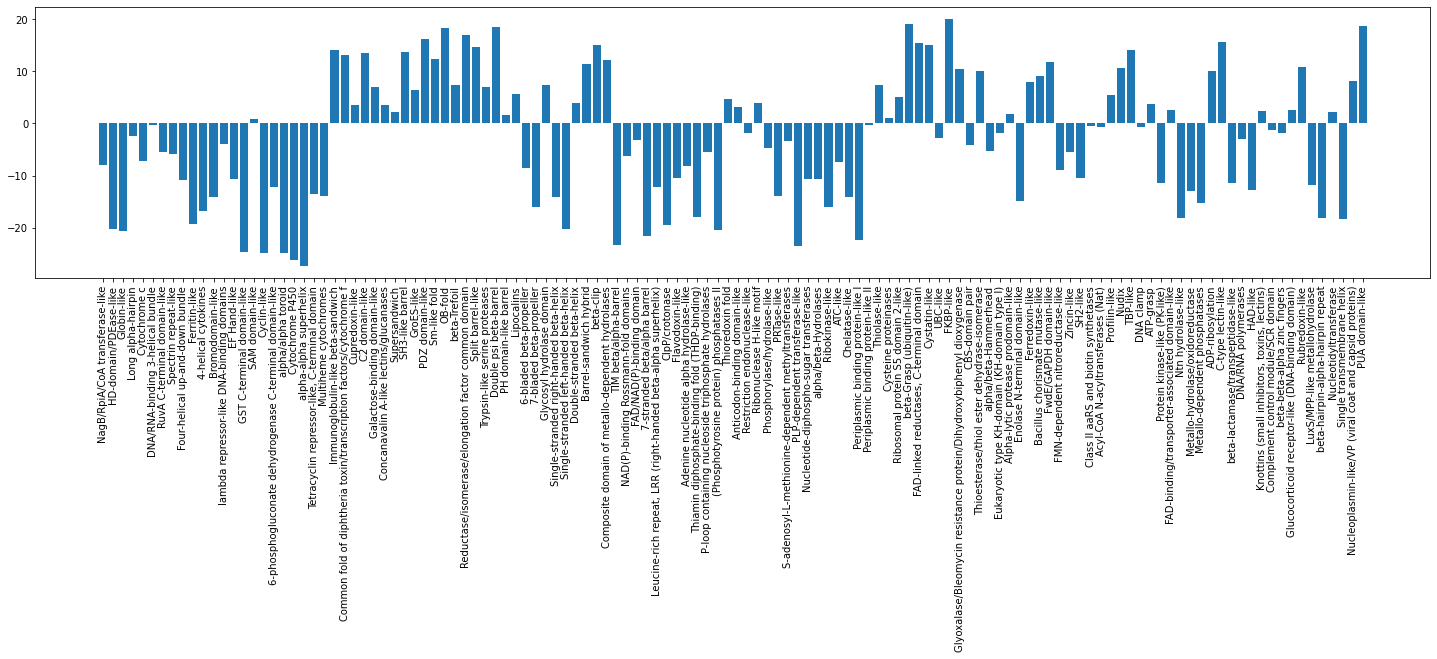

top 10:
 ['FKBP-like' 'beta-Grasp (ubiquitin-like)' 'PUA domain-like'
 'Double psi beta-barrel' 'OB-fold'
 'Reductase/isomerase/elongation factor common domain' 'PDZ domain-like'
 'C-type lectin-like' 'FAD-linked reductases, C-terminal domain'
 'beta-clip'] 


Class probabilities of d5bsra_.ent:


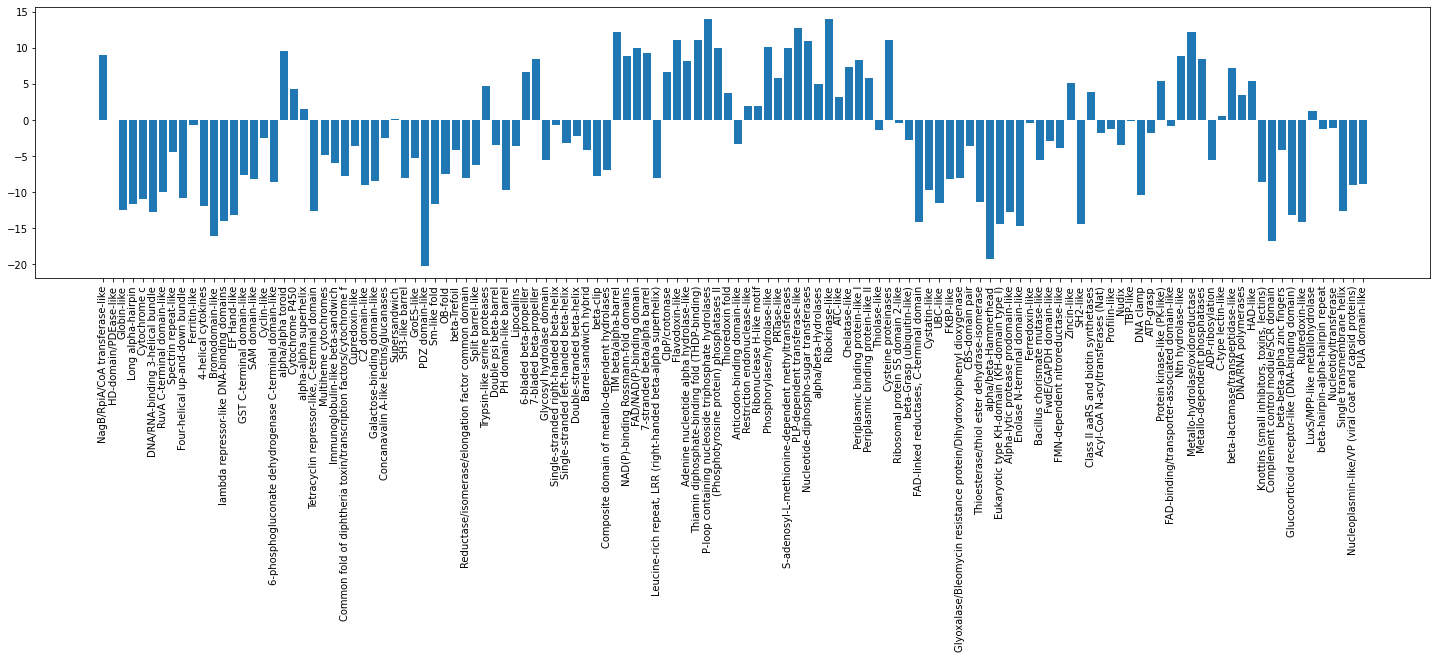

top 10:
 ['Ribokinase-like' 'P-loop containing nucleoside triphosphate hydrolases'
 'PLP-dependent transferase-like' 'TIM beta/alpha-barrel'
 'Metallo-hydrolase/oxidoreductase'
 'Thiamin diphosphate-binding fold (THDP-binding)' 'Cysteine proteinases'
 'Flavodoxin-like' 'Nucleotide-diphospho-sugar transferases'
 'Phosphorylase/hydrolase-like'] 


Class probabilities of d2a19b1.ent:


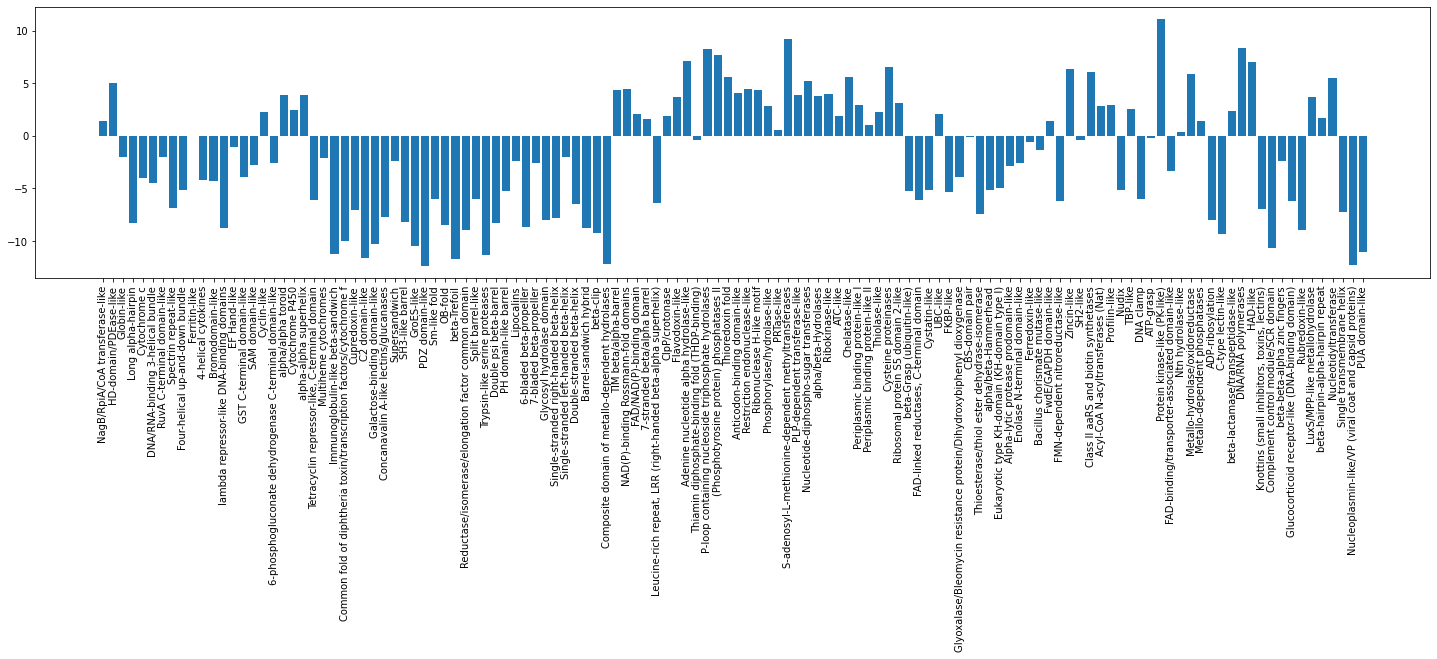

top 10:
 ['Protein kinase-like (PK-like)'
 'S-adenosyl-L-methionine-dependent methyltransferases'
 'DNA/RNA polymerases'
 'P-loop containing nucleoside triphosphate hydrolases'
 '(Phosphotyrosine protein) phosphatases II'
 'Adenine nucleotide alpha hydrolase-like' 'HAD-like'
 'Cysteine proteinases' 'Zincin-like'
 'Class II aaRS and biotin synthetases'] 


Class probabilities of d2o1ea_.ent:


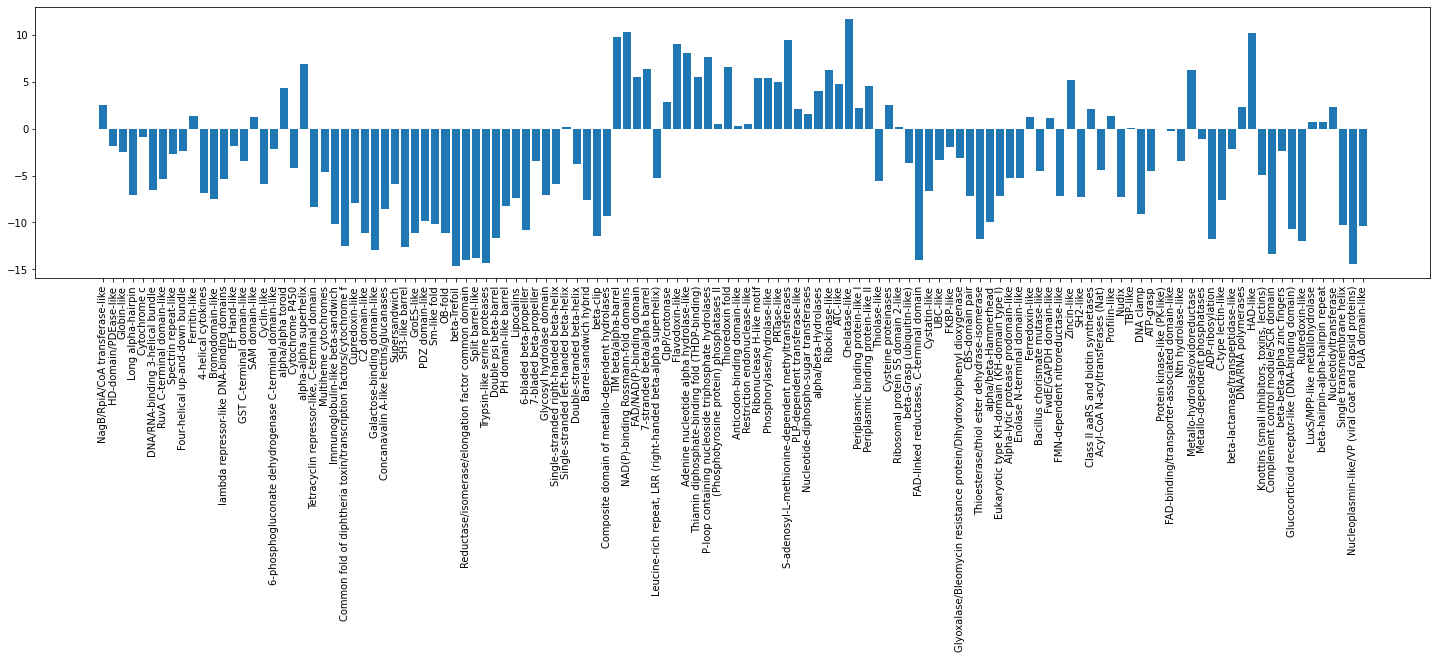

top 10:
 ['Chelatase-like' 'NAD(P)-binding Rossmann-fold domains' 'HAD-like'
 'TIM beta/alpha-barrel'
 'S-adenosyl-L-methionine-dependent methyltransferases' 'Flavodoxin-like'
 'Adenine nucleotide alpha hydrolase-like'
 'P-loop containing nucleoside triphosphate hydrolases'
 'alpha-alpha superhelix' 'Thioredoxin fold'] 


Class probabilities of d1l8aa3.ent:


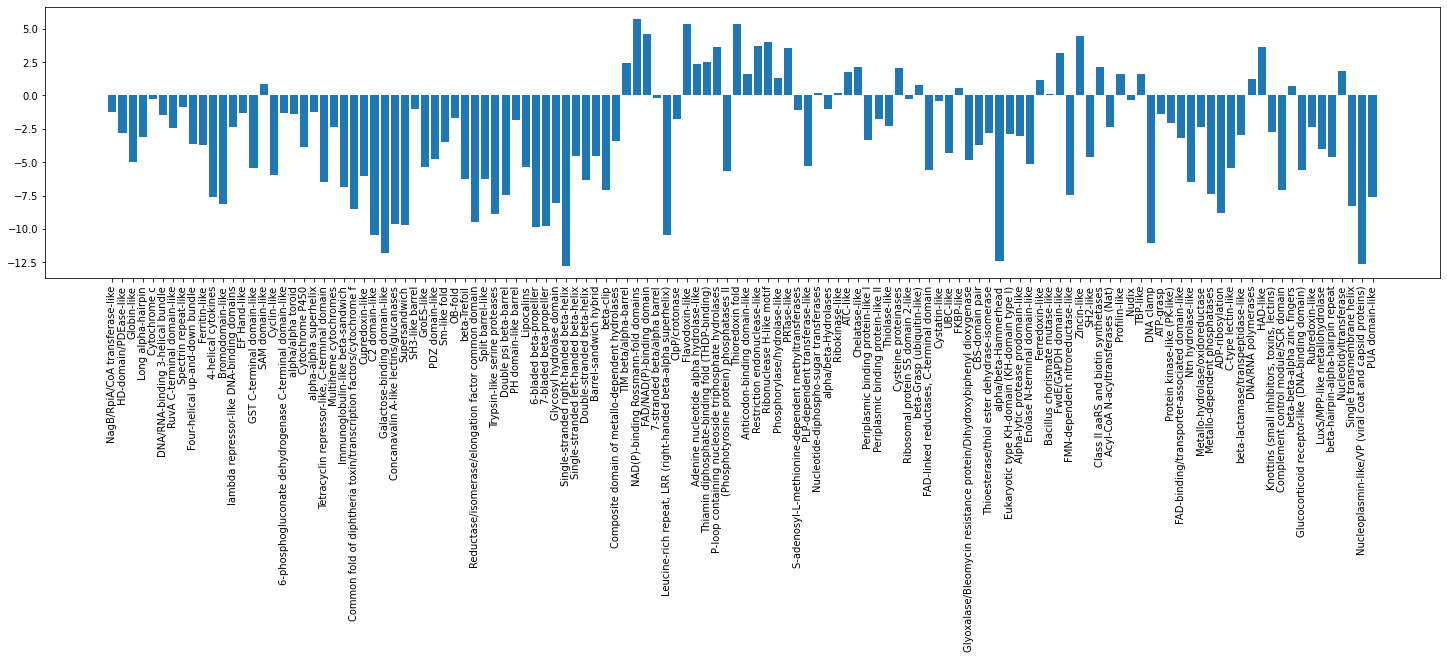

top 10:
 ['NAD(P)-binding Rossmann-fold domains' 'Flavodoxin-like'
 'Thioredoxin fold' 'FAD/NAD(P)-binding domain' 'Zincin-like'
 'Ribonuclease H-like motif' 'Restriction endonuclease-like'
 'P-loop containing nucleoside triphosphate hydrolases' 'HAD-like'
 'PRTase-like'] 


Class probabilities of d4i9ba_.ent:


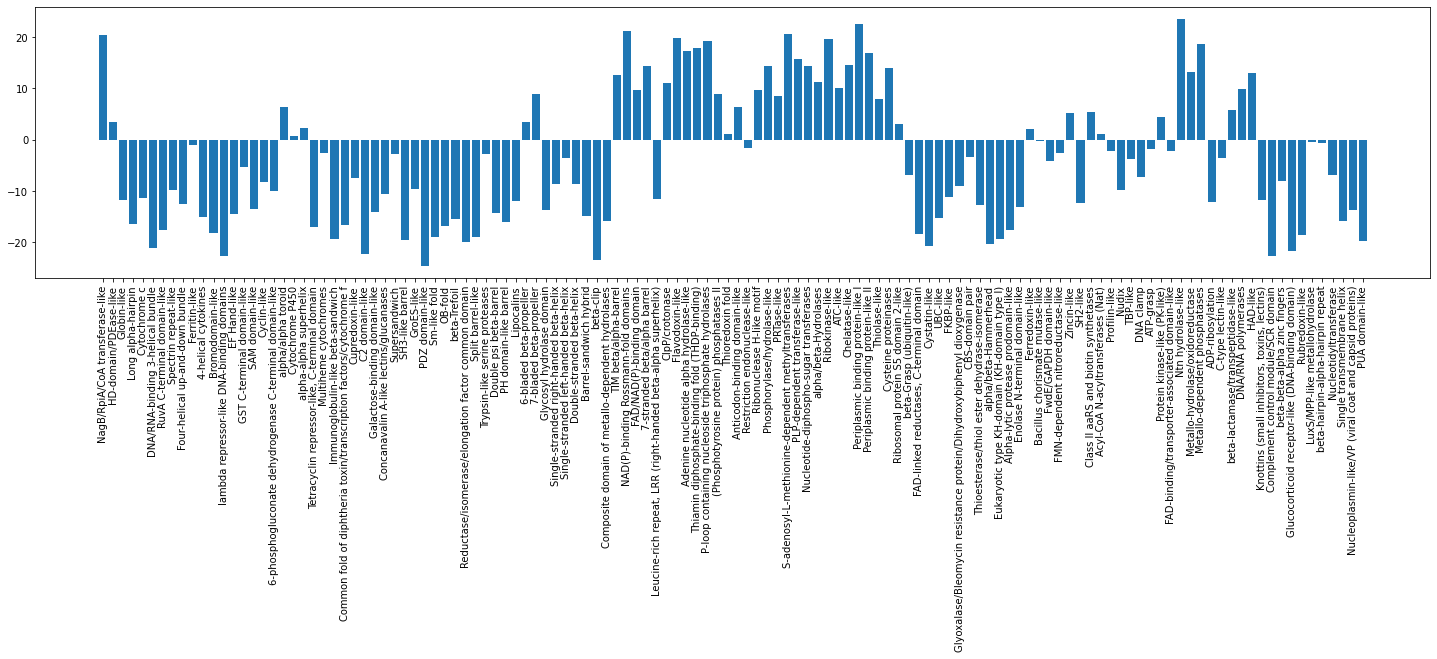

top 10:
 ['Ntn hydrolase-like' 'Periplasmic binding protein-like I'
 'NAD(P)-binding Rossmann-fold domains'
 'S-adenosyl-L-methionine-dependent methyltransferases'
 'NagB/RpiA/CoA transferase-like' 'Flavodoxin-like' 'Ribokinase-like'
 'P-loop containing nucleoside triphosphate hydrolases'
 'Metallo-dependent phosphatases'
 'Thiamin diphosphate-binding fold (THDP-binding)'] 


Class probabilities of d1m2oa2.ent:


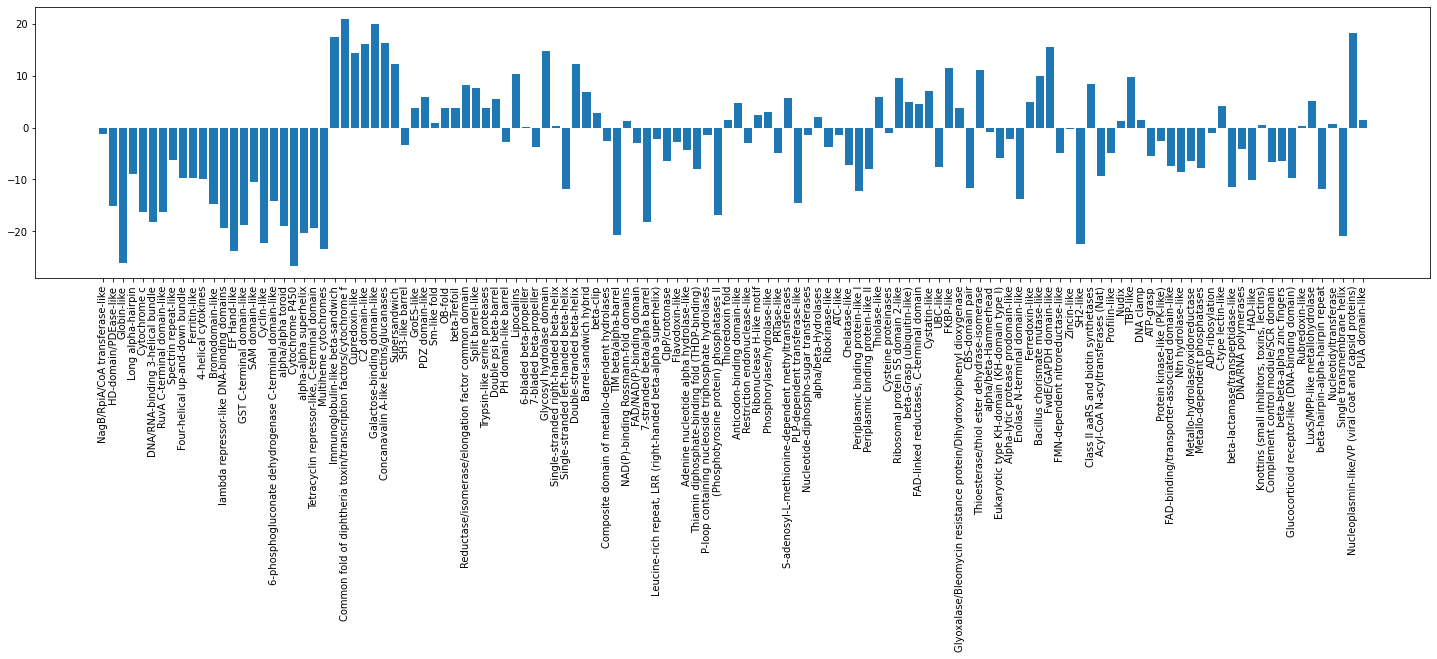

top 10:
 ['Common fold of diphtheria toxin/transcription factors/cytochrome f'
 'Galactose-binding domain-like'
 'Nucleoplasmin-like/VP (viral coat and capsid proteins)'
 'Immunoglobulin-like beta-sandwich'
 'Concanavalin A-like lectins/glucanases' 'C2 domain-like'
 'FwdE/GAPDH domain-like' 'Glycosyl hydrolase domain' 'Cupredoxin-like'
 'Supersandwich'] 


Class probabilities of d2wy3a_.ent:


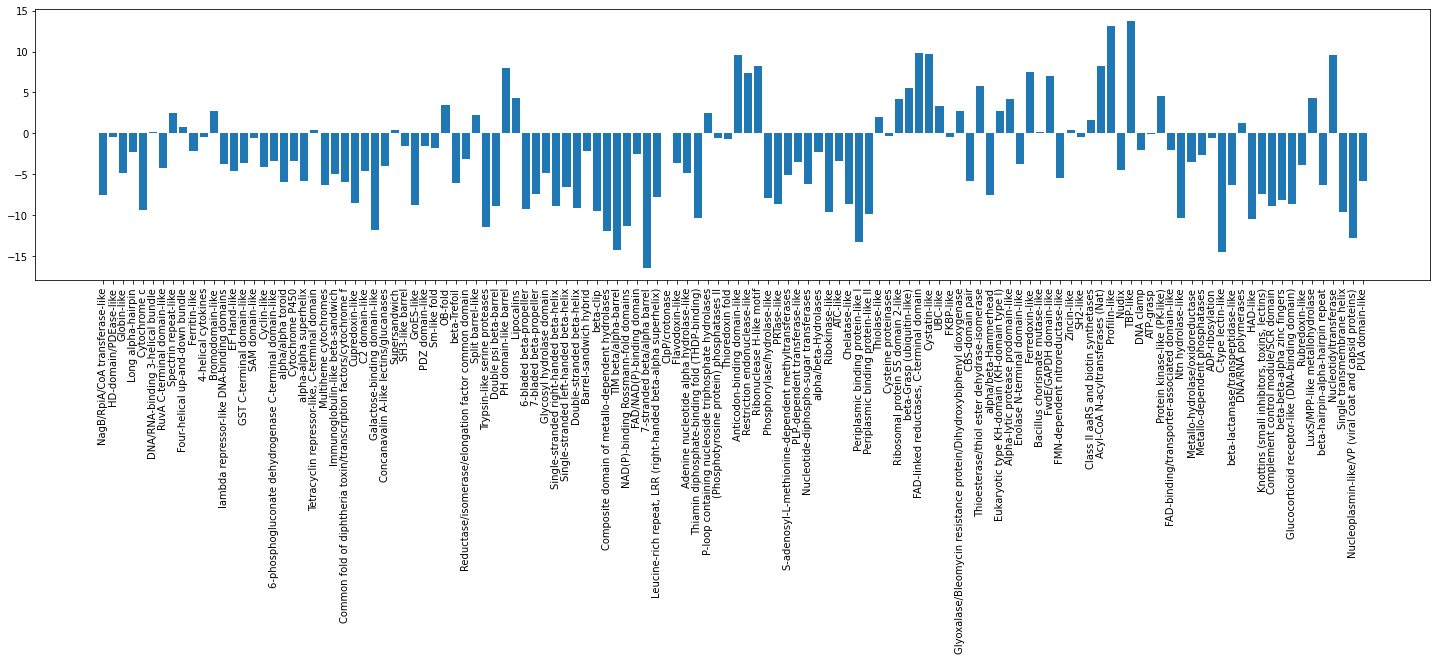

top 10:
 ['TBP-like' 'Profilin-like' 'FAD-linked reductases, C-terminal domain'
 'Cystatin-like' 'Nucleotidyltransferase' 'Anticodon-binding domain-like'
 'Ribonuclease H-like motif' 'Acyl-CoA N-acyltransferases (Nat)'
 'PH domain-like barrel' 'Ferredoxin-like'] 


Class probabilities of d2ag5a1.ent:


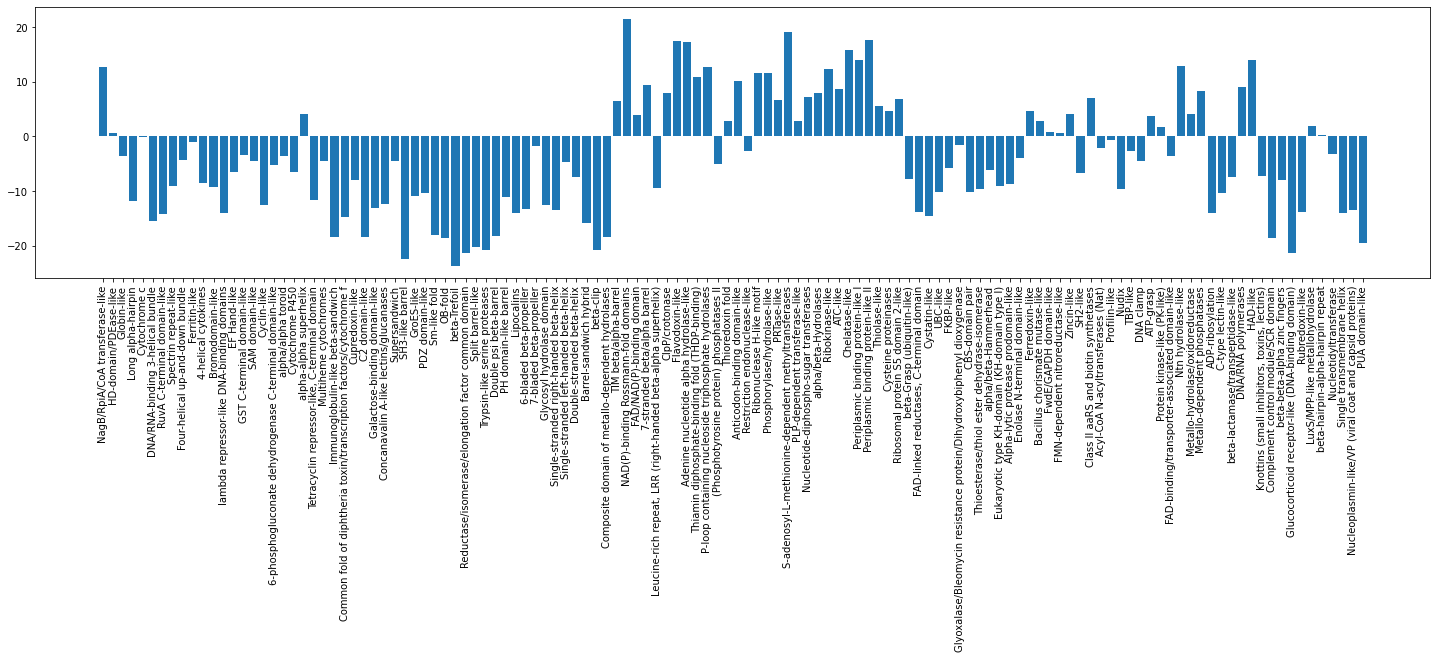

top 10:
 ['NAD(P)-binding Rossmann-fold domains'
 'S-adenosyl-L-methionine-dependent methyltransferases'
 'Periplasmic binding protein-like II' 'Flavodoxin-like'
 'Adenine nucleotide alpha hydrolase-like' 'Chelatase-like'
 'Periplasmic binding protein-like I' 'HAD-like' 'Ntn hydrolase-like'
 'NagB/RpiA/CoA transferase-like'] 


Class probabilities of d1dt9a1.ent:


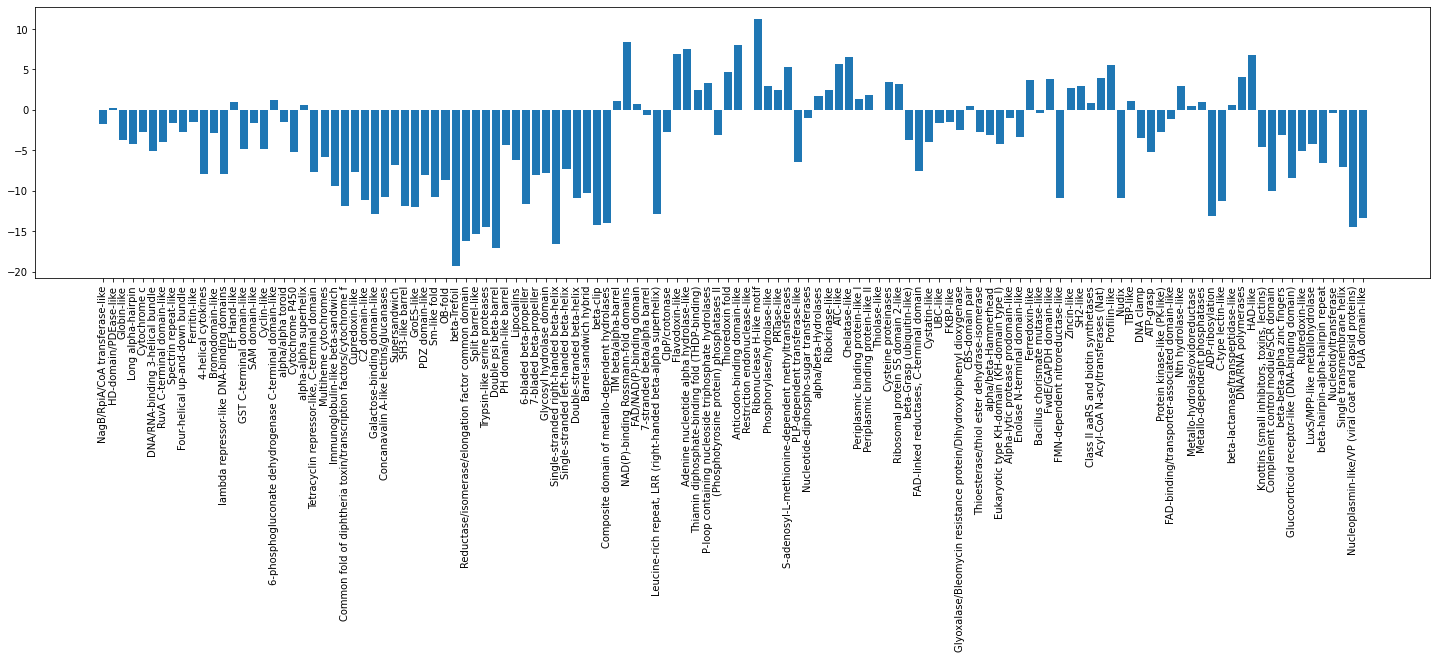

top 10:
 ['Ribonuclease H-like motif' 'NAD(P)-binding Rossmann-fold domains'
 'Anticodon-binding domain-like' 'Adenine nucleotide alpha hydrolase-like'
 'Flavodoxin-like' 'HAD-like' 'Chelatase-like' 'ATC-like' 'Profilin-like'
 'S-adenosyl-L-methionine-dependent methyltransferases'] 




In [83]:
for i in range(10):
    print(f"Class probabilities of {pdb_ids[i]}:")
    plt.figure(figsize=(25,5))
    classes = np.array([scope_id_to_name[emb.model_meta.id_to_classname[x]] for x in range(raw_embedding.shape[1])])
    plt.bar(classes, raw_embedding[i])
    plt.xticks(rotation=90)
    plt.show()
    print("top 10:\n", classes[np.argsort(raw_embedding[i])[::-1]][:10], "\n\n")

In [61]:
from sklearn import cluster
from sklearn.preprocessing import StandardScaler

In [105]:
clusters = cluster.KMeans(n_clusters=20)
clusters.fit(raw_embedding.T)

KMeans(n_clusters=20)

In [109]:
for cluster_id in np.unique(clusters.labels_):
    print(f"cluster {cluster_id}:")
    print(classes[np.arange(raw_embedding.shape[1])[clusters.labels_ == cluster_id]],"\n")

cluster 0:
['alpha/beta-Hydrolases' 'Class II aaRS and biotin synthetases'
 'Protein kinase-like (PK-like)' 'beta-lactamase/transpeptidase-like'
 'DNA/RNA polymerases' 'LuxS/MPP-like metallohydrolase'] 

cluster 1:
['SH3-like barrel' 'OB-fold' 'Barrel-sandwich hybrid'
 'beta-Grasp (ubiquitin-like)' 'FKBP-like'] 

cluster 2:
['Long alpha-hairpin' 'DNA/RNA-binding 3-helical bundle'
 'RuvA C-terminal domain-like' 'Spectrin repeat-like'
 'lambda repressor-like DNA-binding domains' 'SAM domain-like'
 'Eukaryotic type KH-domain (KH-domain type I)'
 'Alpha-lytic protease prodomain-like' 'beta-beta-alpha zinc fingers'] 

cluster 3:
['Single-stranded right-handed beta-helix'
 'Single-stranded left-handed beta-helix'
 'Leucine-rich repeat, LRR (right-handed beta-alpha superhelix)'
 'FMN-dependent nitroreductase-like' 'beta-hairpin-alpha-hairpin repeat'] 

cluster 4:
['UBC-like' 'Enolase N-terminal domain-like'] 

cluster 5:
['GroES-like' 'PDZ domain-like'
 'Reductase/isomerase/elongation factor 

In [112]:
from umap import UMAP
umap_embedding = UMAP(n_neighbors=50, n_components=2).fit_transform(raw_embedding.T)

import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=umap_embedding[:, 0],
                                y=umap_embedding[:, 1],
                                mode='markers',
                                marker_color=clusters.labels_,
                                text=classes)) # hover text goes here

fig.update_layout(title='Fold similarity')
fig.show()